In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('loan_prediction.csv')

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df.shape

(614, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
df.isnull().sum()# Data has missing values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
mode=df['Gender'].mode()
mode

0    Male
dtype: object

In [12]:
df['Gender'].fillna('Male',inplace=True)

In [13]:
mode=df['Married'].mode()
mode

0    Yes
dtype: object

In [14]:
df['Married'].fillna('Yes',inplace=True)

In [15]:
mode=df['Dependents'].mode()
mode

0    0
dtype: object

In [16]:
df['Dependents'].fillna(0,inplace=True)

In [17]:
mode=df['Self_Employed'].mode()
mode

0    No
dtype: object

In [18]:
df['Self_Employed'].fillna('No',inplace=True)

In [19]:
mean=df['LoanAmount'].mean()
mean

146.41216216216216

In [20]:
df['LoanAmount'].fillna(mean,inplace=True)

In [21]:
mean=df['Credit_History'].mean()
mean

0.8421985815602837

In [22]:
df['Credit_History'].fillna(mean,inplace=True)

In [23]:
mean=df['Loan_Amount_Term'].mean()
mean

342.0

In [24]:
df['Loan_Amount_Term'].fillna(mean,inplace=True)

In [25]:
df.isnull().sum()# all missing values have been replaced with mean or mode

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Loan_ID'] = le.fit_transform(df['Loan_ID']) 
df['Gender'] = le.fit_transform(df['Gender']) 
df['Married'] = le.fit_transform(df['Married']) 
df['Education'] = le.fit_transform(df['Education']) 
df['Self_Employed'] = le.fit_transform(df['Self_Employed']) 
df['Property_Area'] = le.fit_transform(df['Property_Area']) 
df['Loan_Status'] = le.fit_transform(df['Loan_Status']) 

In [27]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', 0], dtype=object)

In [28]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
0      15
Name: Dependents, dtype: int64

In [29]:
df['Dependents']=df['Dependents'].replace('3+',3)

In [30]:
df['Dependents']=pd.to_numeric(df['Dependents'])

In [31]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


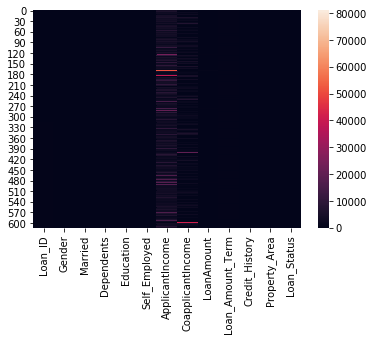

In [32]:
sns.heatmap(df)

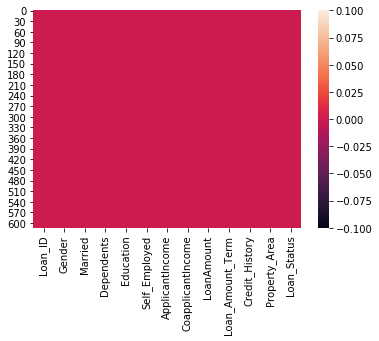

In [33]:
sns.heatmap(df.isnull())

In [34]:
dfcor=df.corr()
dfcor

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.016925,0.039211,0.035684,-0.028945,-0.032429,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.012819,-0.025752,0.017987
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.005852,0.004257,0.091478
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.037392,-0.000244,0.010118
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.016925,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.035684,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.028945,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974


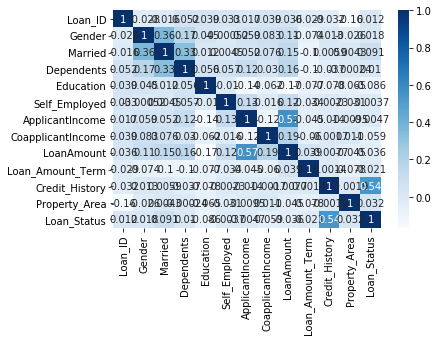

In [35]:
sns.heatmap(dfcor,cmap="Blues",annot=True)

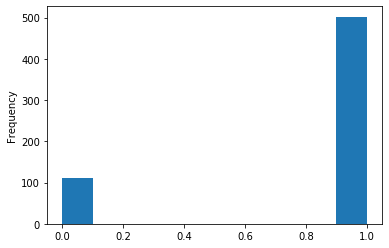

In [36]:
df['Gender'].plot.hist()

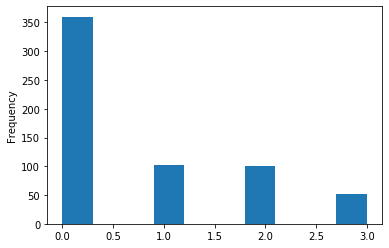

In [37]:
df['Dependents'].plot.hist()

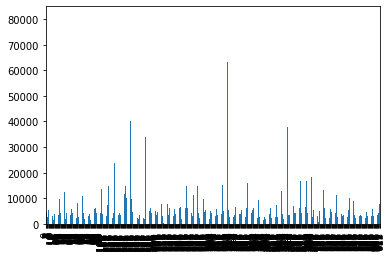

In [38]:
df['ApplicantIncome'].plot.bar()

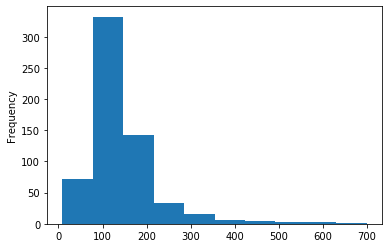

In [39]:
df['LoanAmount'].plot.hist()

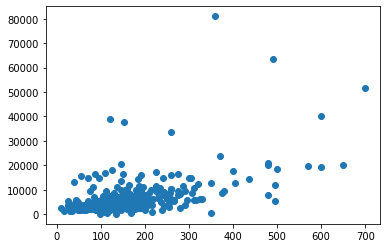

In [40]:
plt.scatter(df['LoanAmount'],df['ApplicantIncome'])
plt.show() 

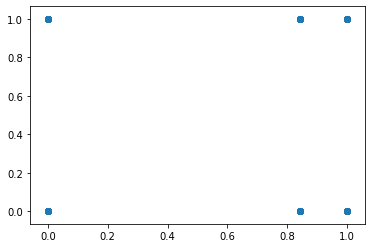

In [41]:
plt.scatter(df['Credit_History'],df['Loan_Status'])
plt.show() 

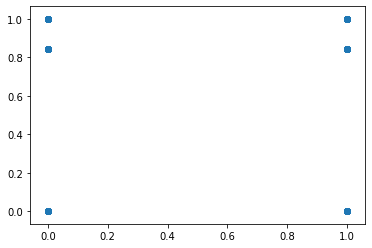

In [42]:
plt.scatter(df['Education'],df['Credit_History'])
plt.show() 

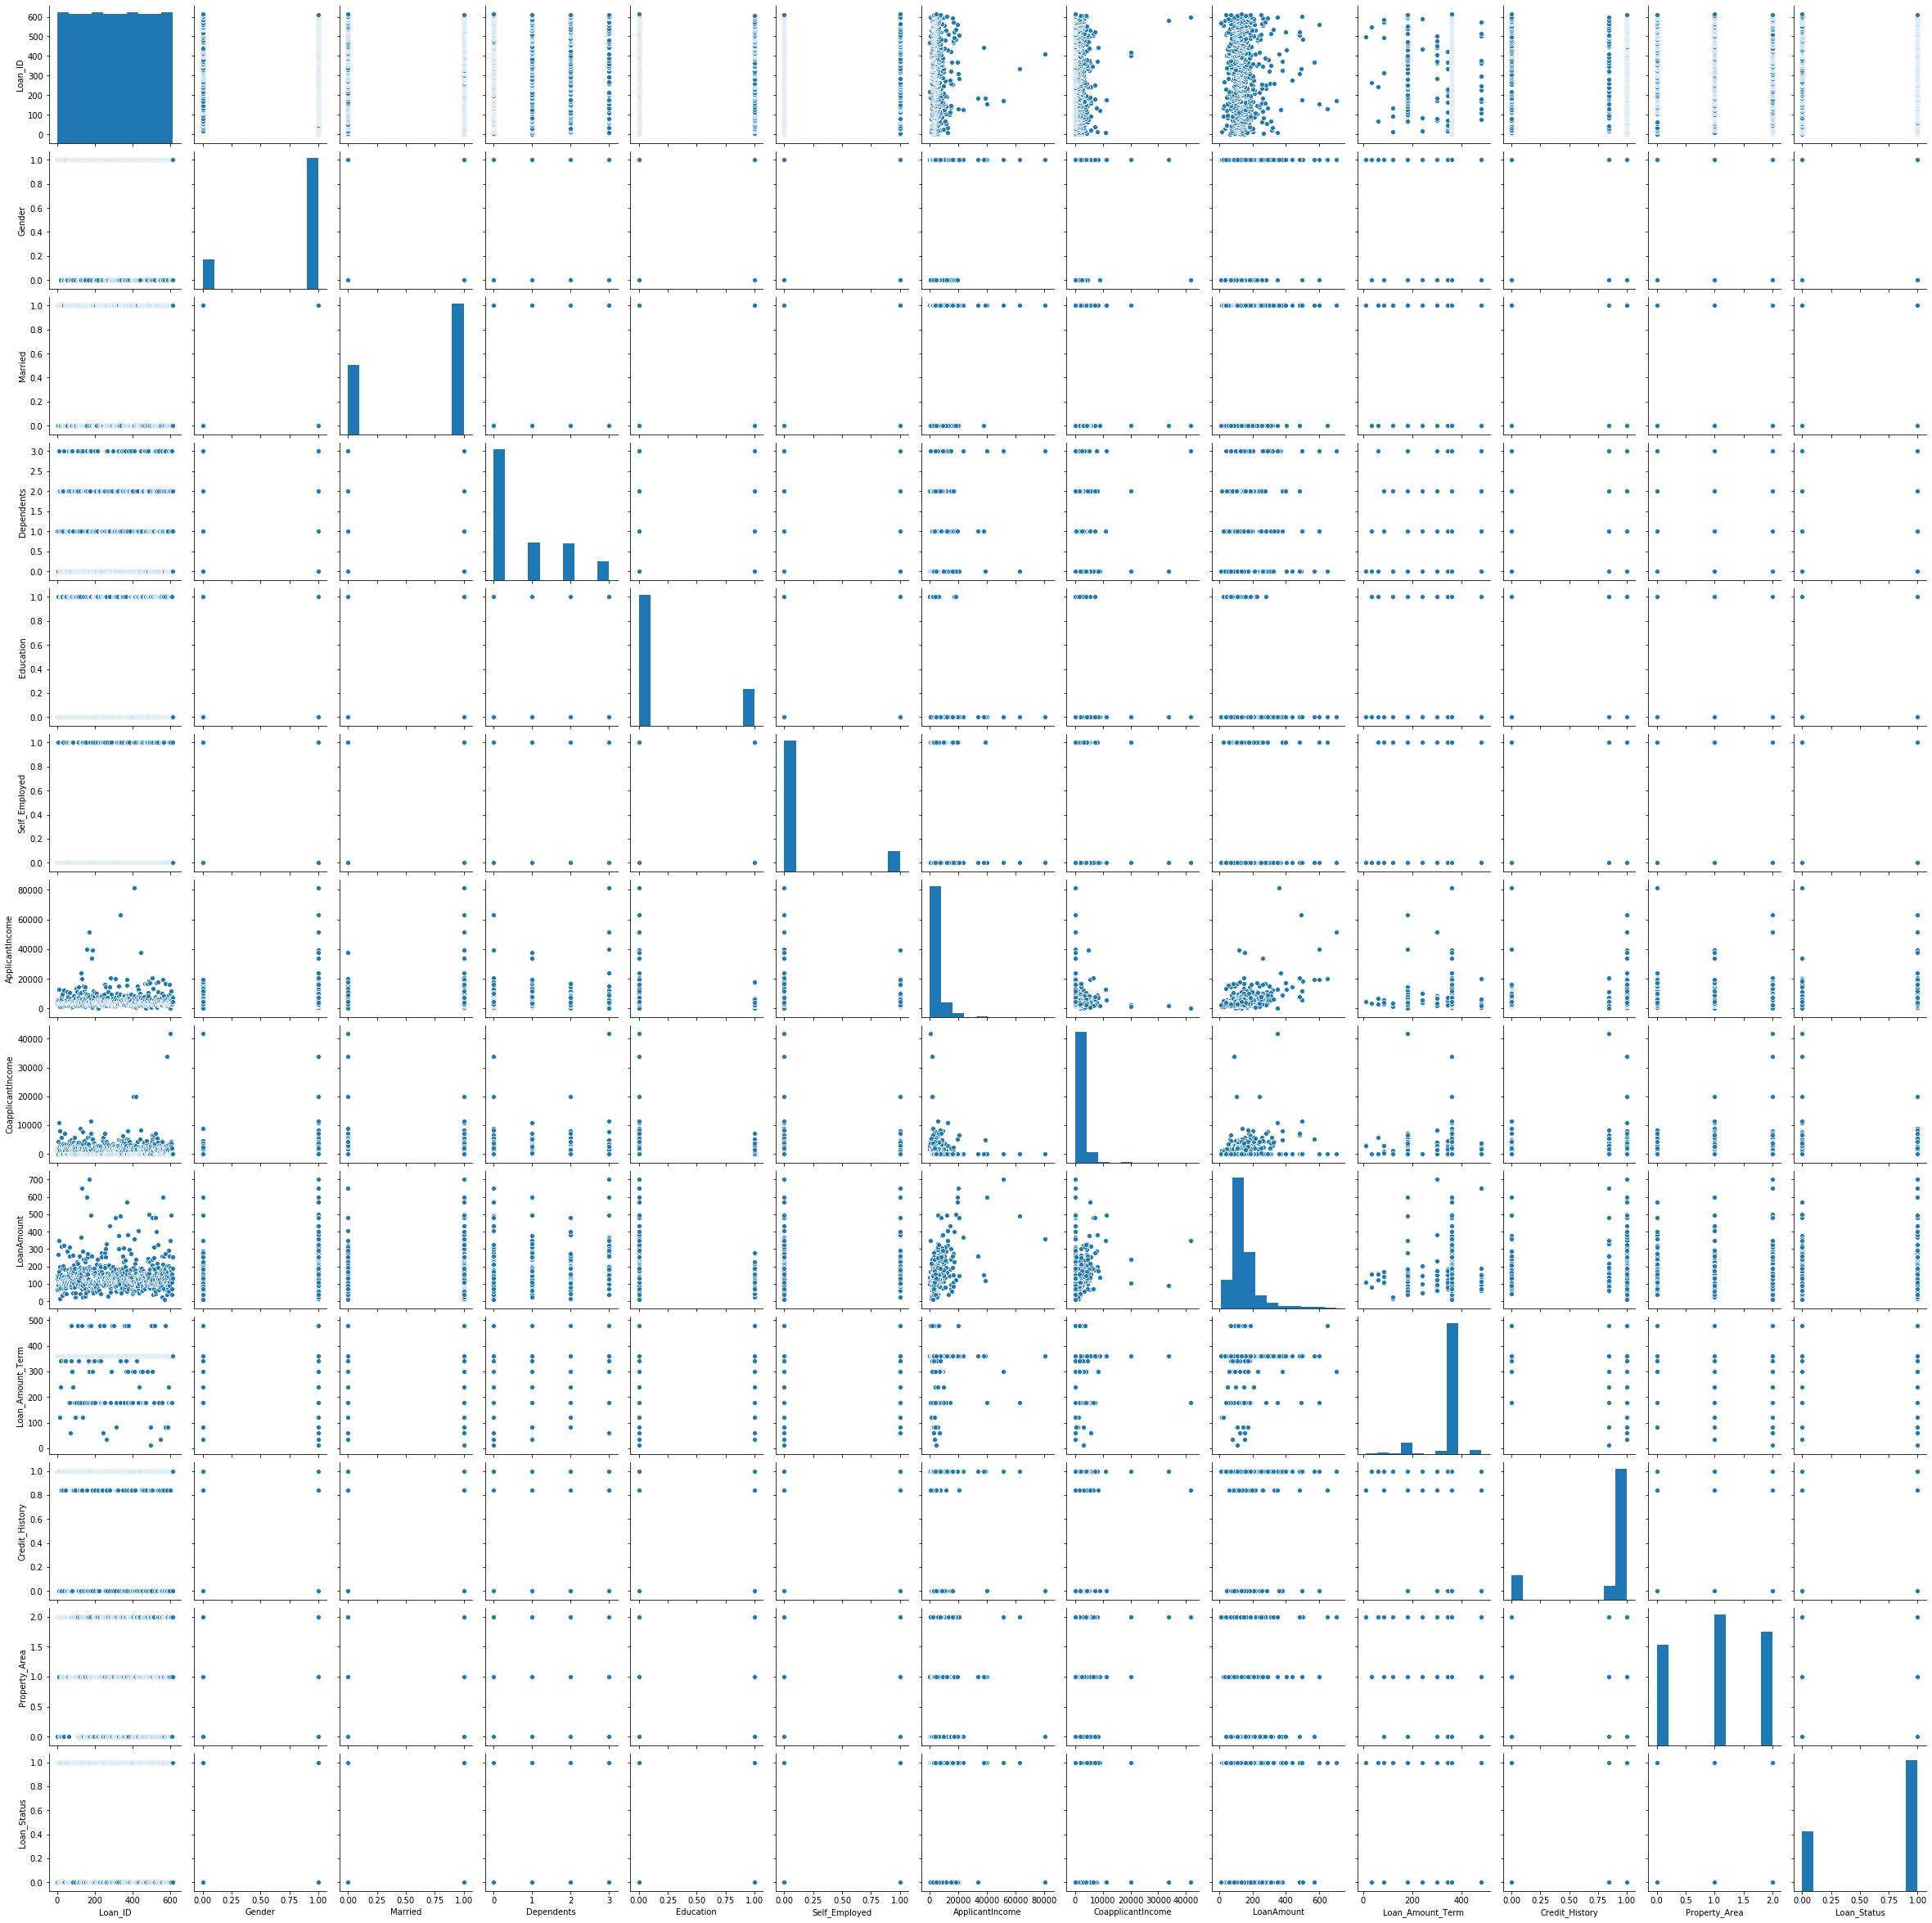

In [43]:
sns.pairplot(df)

In [44]:
collist=df.columns.values
ncol=13
nrows=4

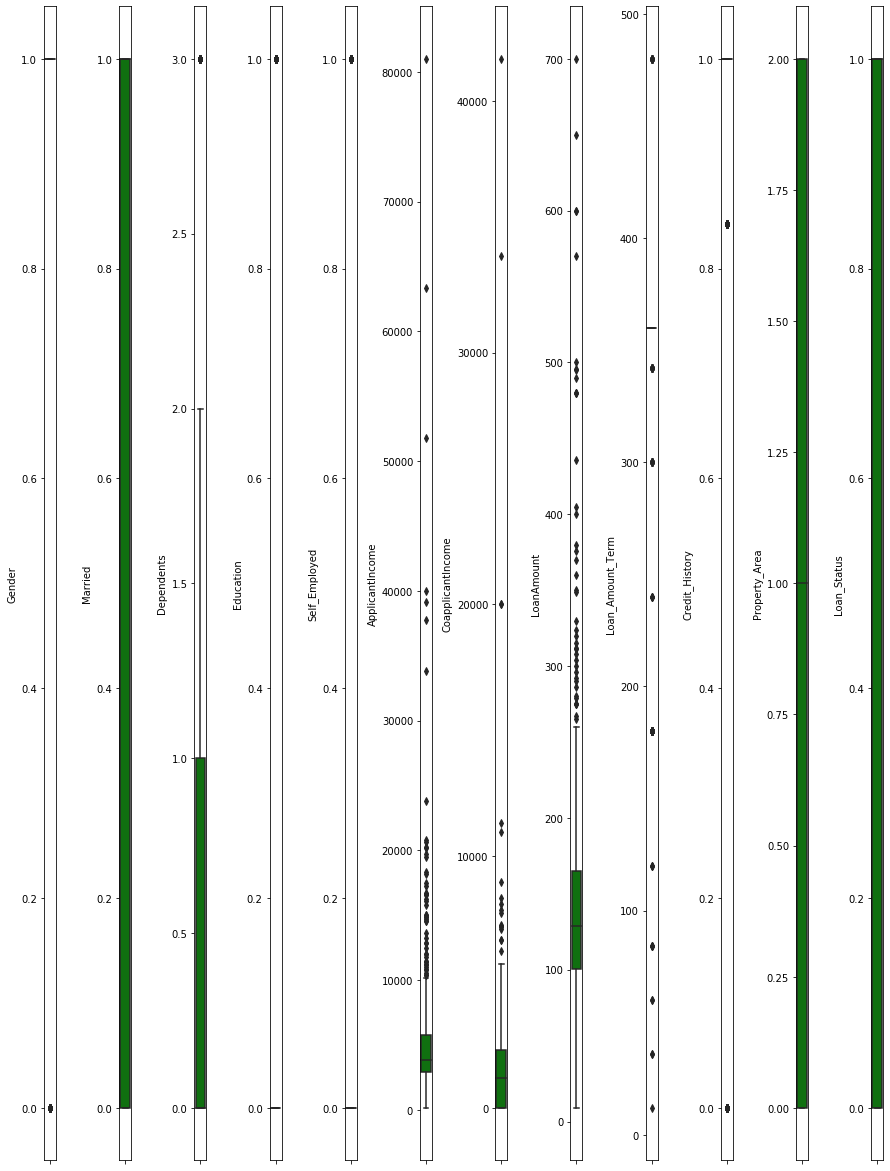

In [45]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()#outliers exists

In [46]:
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df_new=df.loc[(z_score<3).all(axis=1)]
print(df_new.shape)# Outiers are out

(614, 13)
(577, 13)


In [47]:
df_new.skew()

Loan_ID              0.010879
Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [48]:
Dependents_sqrt=np.sqrt(df_new['Dependents'])
Dependents_sqrt.skew()

0.610337913916159

In [49]:
Education_sqrt=np.sqrt(df_new['Education'])
Education_sqrt.skew()

1.3065883459576062

In [50]:
Self_Employed_sqrt=np.sqrt(df_new['Self_Employed'])
Self_Employed_sqrt.skew()

2.2528479205324365

In [51]:
ApplicantIncome_sqrt=np.sqrt(df_new['ApplicantIncome'])
ApplicantIncome_sqrt.skew()

1.2086126392712866

In [52]:
CoapplicantIncome_sqrt=np.sqrt(df_new['CoapplicantIncome'])
CoapplicantIncome_sqrt.skew()

0.2075911285132824

In [53]:
LoanAmount_sqrt=np.sqrt(df_new['LoanAmount'])
LoanAmount_sqrt.skew()

0.32037194343605385

In [54]:
df_new.skew()

Loan_ID              0.010879
Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [55]:
#seperating my input and output variables
x=df_new.iloc[:,0:-1]
x.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2


In [56]:
y=pd.DataFrame(df_new['Loan_Status'])
y.head()

,Loan_Status
0,1
1,0
2,1
3,1
4,1


In [57]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_new)
x=pd.DataFrame(x,columns=df_new.columns)

In [58]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=9,stratify=y)

In [59]:
x_train.shape,x_test.shape

((403, 13), (174, 13))

In [60]:
y_train.shape,y_test.shape

((403, 1), (174, 1))

In [61]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc

In [62]:
KNN=KNeighborsClassifier(n_neighbors=6)
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=6)
GNB=GaussianNB()

In [63]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))

*********************** KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


Accuracy_score=  0.9597701149425287


Cross_Val_Score=  0.9652147610405324


roc_auc_score=  0.9351851851851851


classification_report
               precision    recall  f1-score   support

           0       1.00      0.87      0.93        54
           1       0.94      1.00      0.97       120

    accuracy                           0.96       174
   macro avg       0.97      0.94      0.95       174
weighted avg       0.96      0.96      0.96       174


[[ 47   7]
 [  0 120]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** SVC ***********************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
 

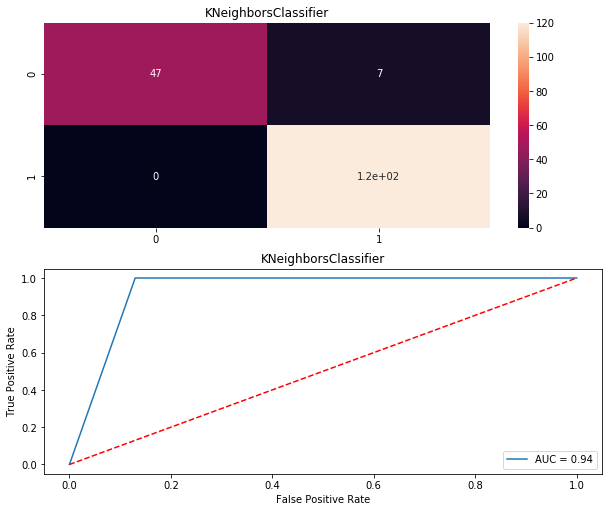

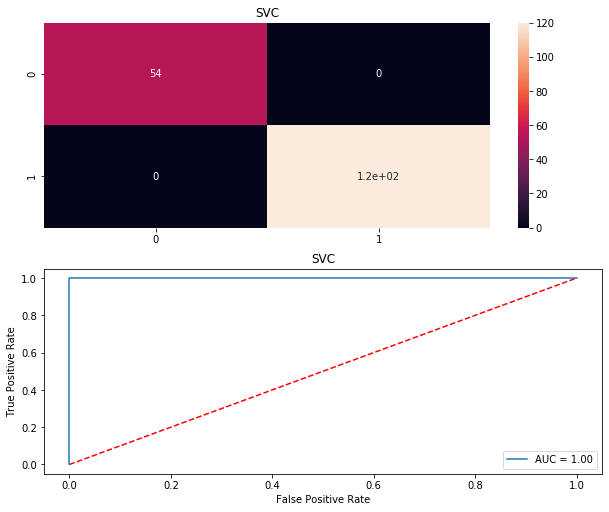

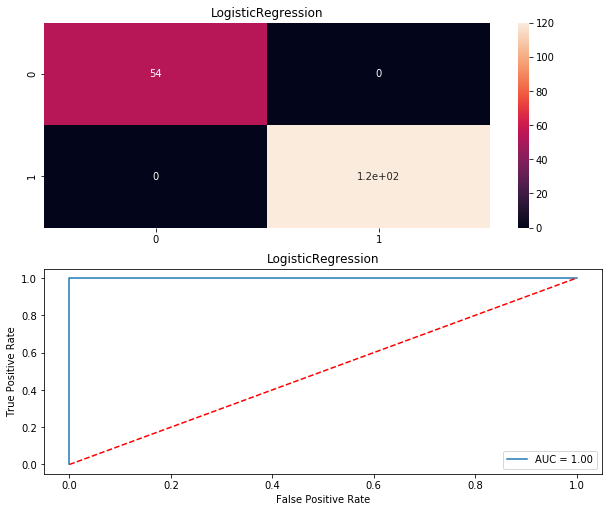

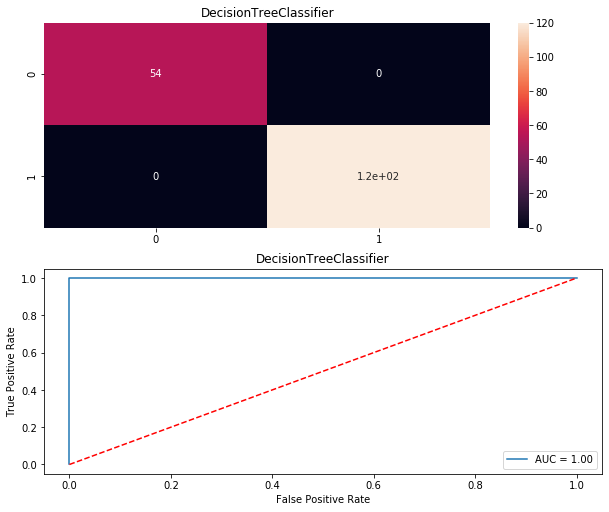

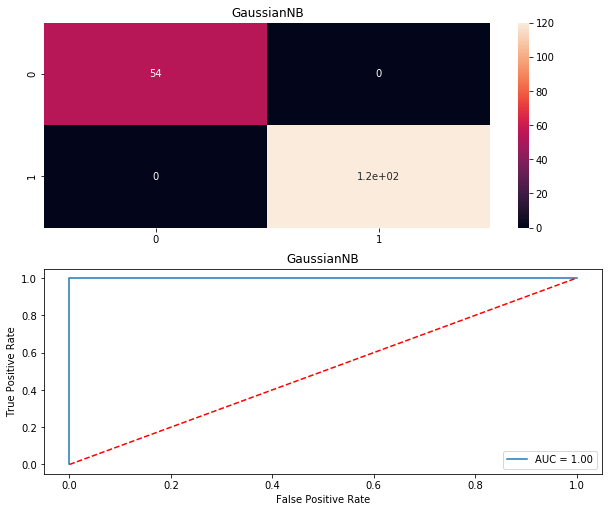

In [64]:
Model = []
score = []
cvs = []
rocscore =[]
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score= ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score= ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print('roc_auc_score= ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre), end = "\n\n")
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [65]:
result=pd.DataFrame({'Model':Model, 'Accuracy_score': score,'Cross_val_score':cvs, 'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,95.977011,96.521476,93.518519
1,SVC,100.000000,99.827586,100.000000
2,LogisticRegression,100.000000,100.000000,100.000000
3,DecisionTreeClassifier,100.000000,100.000000,100.000000
4,GaussianNB,100.000000,100.000000,100.000000


In [66]:
from sklearn.externals import joblib

In [67]:
joblib.dump(DT,'loan_predfile.obj')

['loan_predfile.obj']